# Analyse des corrétaions et tendances de l'AQI


In [2]:
# Importation des bibliothèques
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [3]:
# Extraction de donnée mergée
def extract_appended_data(file_path):
    return pd.read_csv(file_path)

APPENDED_DATA_PATH = f'{os.getenv('AIRFLOW_HOME')}/data/appended'
all_data = f'{APPENDED_DATA_PATH}/all_data.csv'
data = extract_appended_data(all_data)

### - Histplot

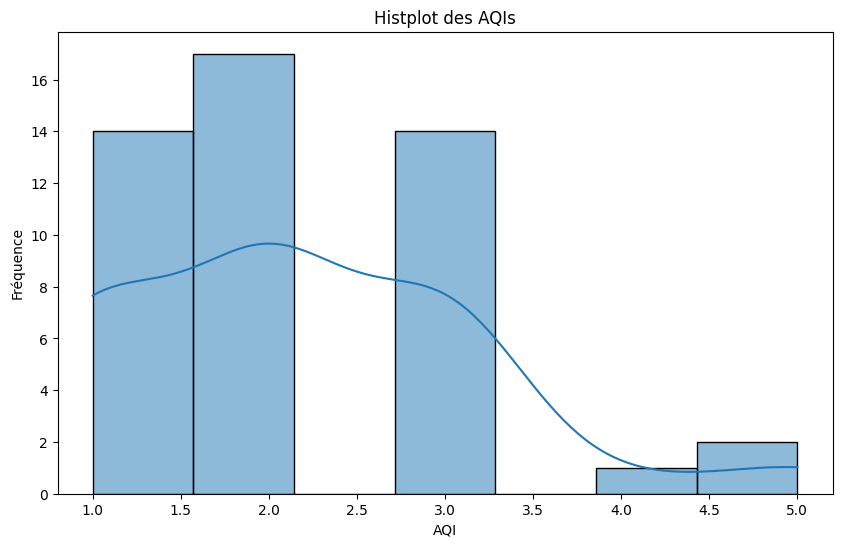

In [31]:
plt.figure(figsize=(10, 6))
sns.histplot(data['AQI'], kde=True)
plt.title('Histplot des AQIs')
plt.xlabel('AQI')
plt.ylabel('Fréquence')
plt.show()

### - Boxplot

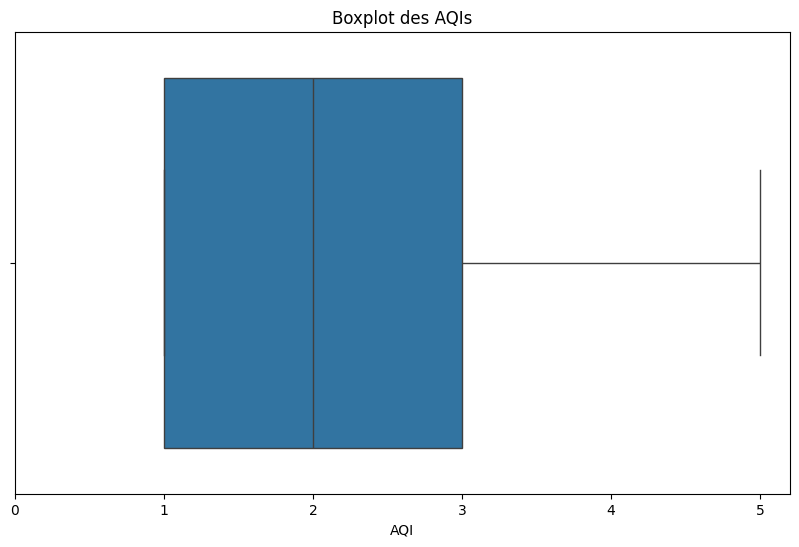

In [5]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['AQI'])
plt.xlim(0)  # Set the x-axis limit to start from 0
plt.title('Boxplot des AQIs')
plt.xlabel('AQI')
plt.show()

### - Boxplot avec percentiles

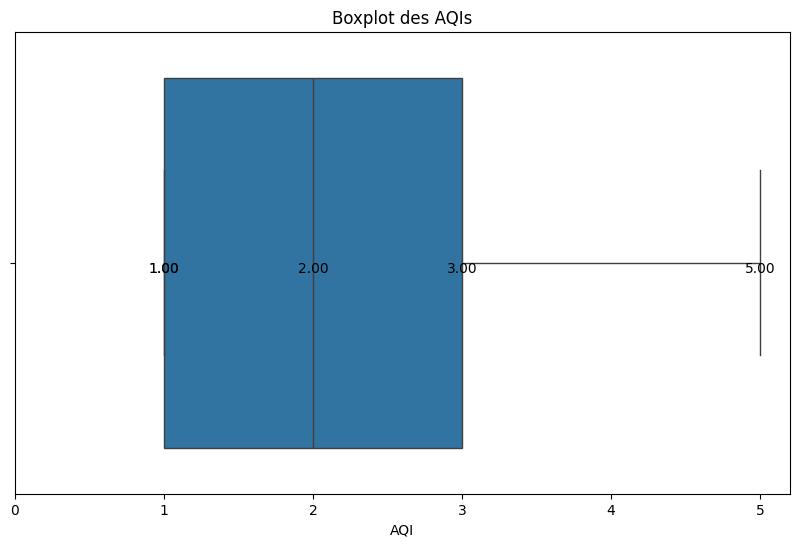

In [7]:
# Calculer les percentiles
percentiles = np.percentile(data['AQI'], [0, 25, 50, 75, 100])

plt.figure(figsize=(10, 6))
sns.boxplot(x=data['AQI'])
plt.xlim(0)  # Début de l'axe x à 0
plt.title('Boxplot des AQIs')
plt.xlabel('AQI')

# Ajouter des annotations pour les percentiles
for p in percentiles:
    plt.text(p, 0.02, f'{p:.2f}', horizontalalignment='center')

plt.show()

### - Relation entre Localisation et AQI

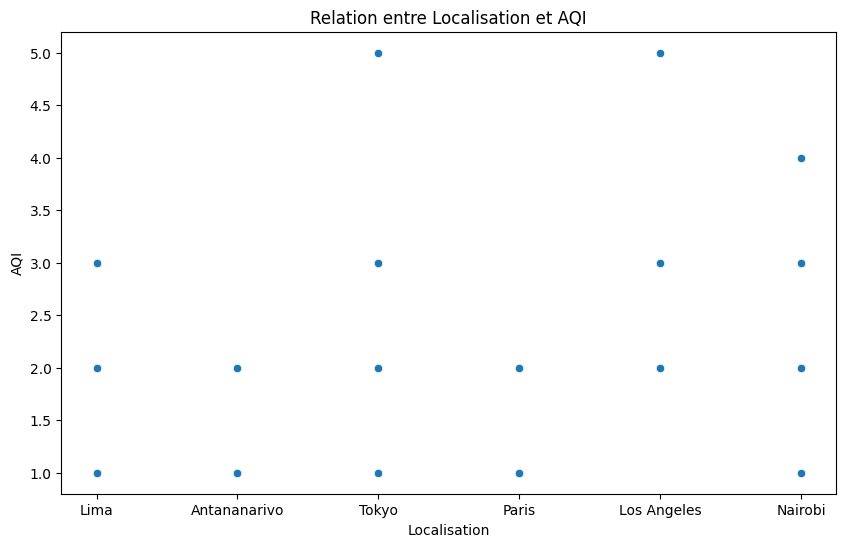

In [25]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Location', y='AQI', data=data)
plt.title('Relation entre Localisation et AQI')
plt.xlabel('Localisation')
plt.ylabel('AQI')
plt.show()

### - AQI moyens par Localisation

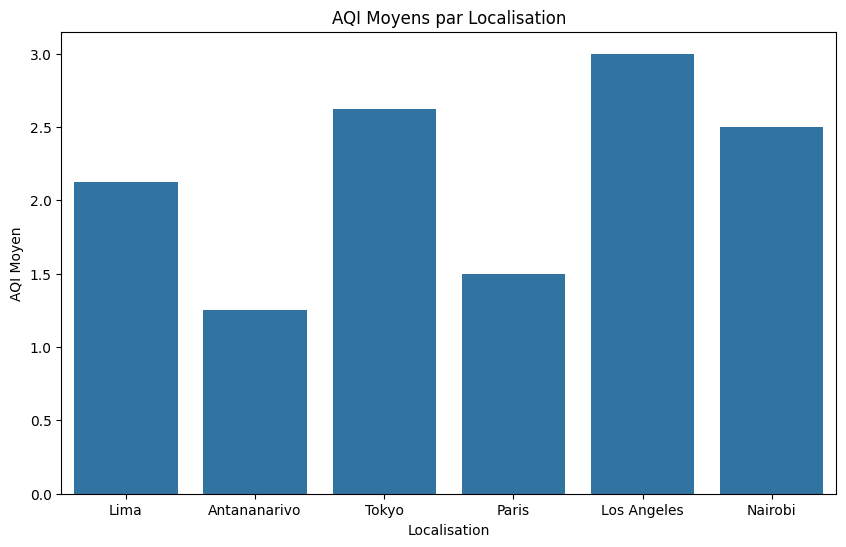

In [11]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Location', y='AQI', data=data, errorbar=None)
plt.title('AQI Moyens par Localisation')
plt.xlabel('Localisation')
plt.ylabel('AQI Moyen')
plt.show()

### - Heatmap des corrélations

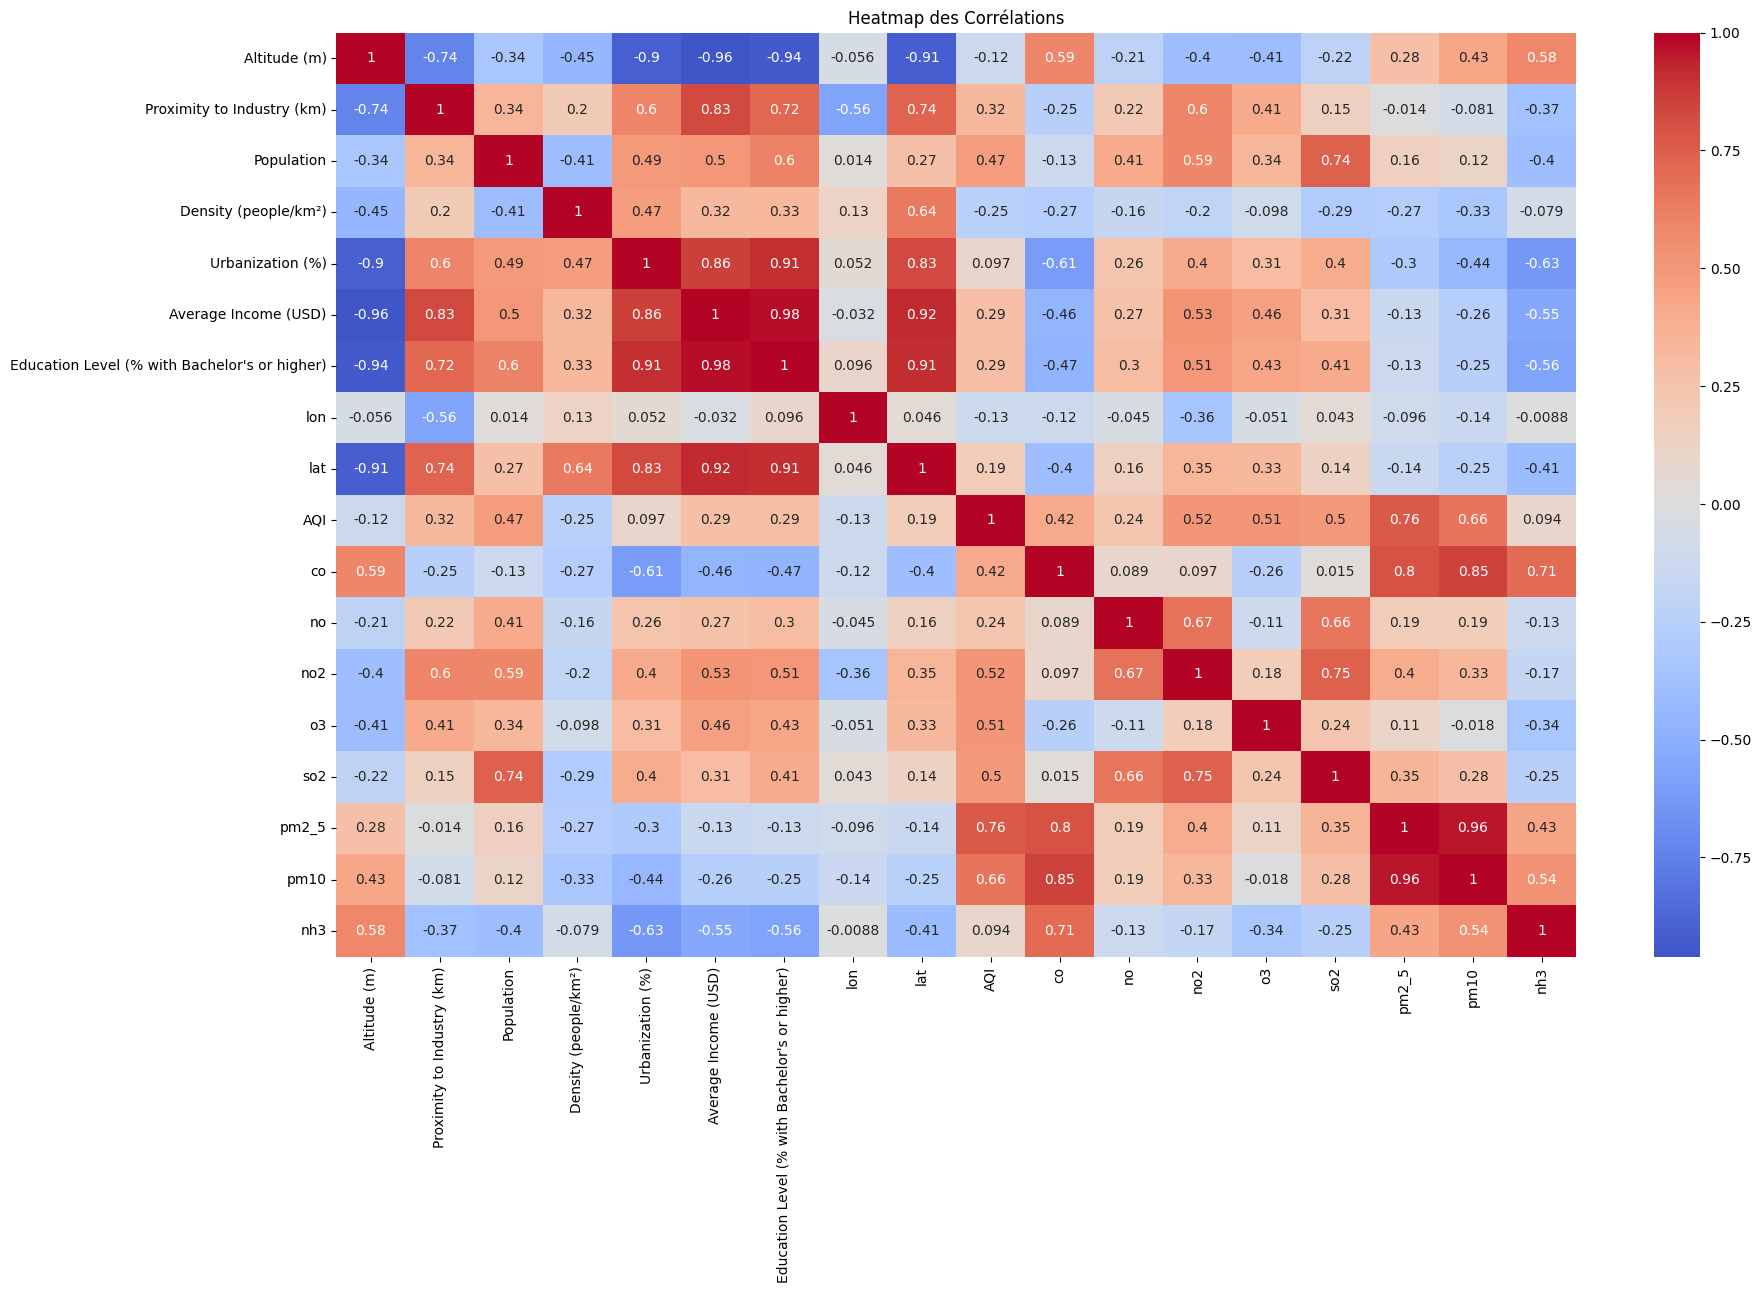

In [28]:
# Sélectionner uniquement les colonnes numériques
numerical_data = data.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(20, 12))
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Heatmap des Corrélations')
plt.show()